In [346]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse, r2_score as r2, mean_absolute_error as mae
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

sns.set()
matplotlib.rcParams.update({'font.size': 14})

In [347]:
# Importing the CSV file
test_path_data='test.csv'
train_path_data='train.csv'

In [348]:
# Read and observe the data table 
test_df=pd.read_csv(test_path_data)
train_df=pd.read_csv(train_path_data)
train_df.head().T

,0,1,2,3,4
Id,11809,3013,8215,2352,13866
DistrictId,27,22,1,1,94
Rooms,3.0,1.0,3.0,1.0,2.0
Square,115.027311,39.832524,78.342215,40.409907,64.285067
LifeSquare,NaN,23.169223,47.671972,NaN,38.562517
KitchenSquare,10.0,8.0,10.0,1.0,9.0
Floor,4,7,2,10,16
HouseFloor,10.0,8.0,17.0,22.0,16.0
HouseYear,2014,1966,1988,1977,1972
Ecology_1,0.075424,0.118537,0.025609,0.007122,0.282798


In [349]:
# Identify the spread of the data set
train_df.shape, test_df.shape


((10000, 20), (5000, 19))

In [350]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

(None, None)

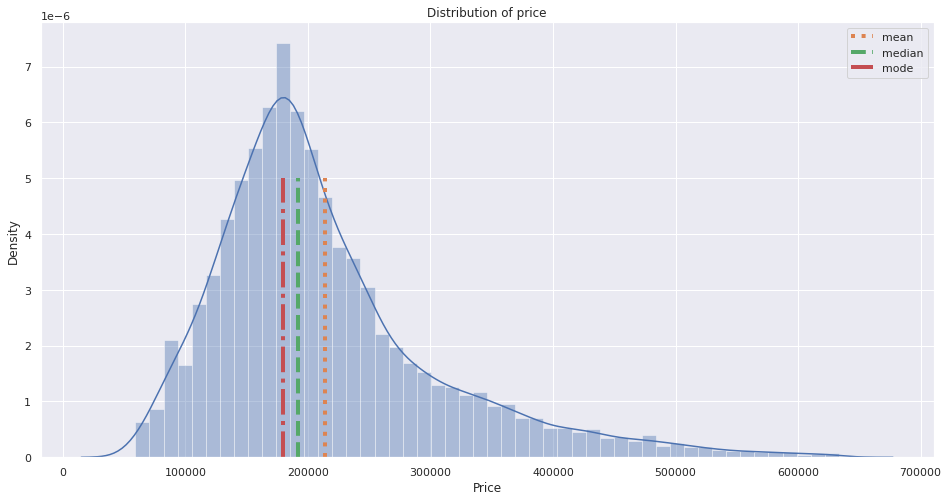

In [351]:
#distribution of target var
target_bins = train_df['Price'] // 10000 * 10000
target_mean = round(train_df['Price'].mean(), 2)
target_median = train_df['Price'].median()
target_mode = target_bins.mode()[0]

plt.figure(figsize = (16, 8))

sns.distplot(train_df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

In [352]:
train_df=train_df[train_df['Price']<350000].reset_index()

In [353]:
train_df.describe()
#see thant we need to check the data anomalies and outliers in rooms, lifesquare, kitchensquare, housefloor, houseyear. 

,index,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,7041.000000,9075.000000,9075.000000,9075.000000,9.075000e+03,9075.000000,9075.000000,9075.000000,9075.000000,4578.000000,9075.000000,9075.000000,9075.000000
mean,5014.526942,8364.282865,47.897300,1.798457,53.792107,35.391563,6.031736,8.352066,12.451019,4.194208e+03,0.120884,24.118567,5237.408044,7.373444,1104.975317,1.244738,4.083526,191999.000566
std,2884.018538,4848.062510,41.996216,0.794819,19.394860,90.719845,29.906932,5.110161,6.672517,2.104707e+05,0.120129,17.859277,4065.969893,23.383407,972.395793,1.458312,4.805664,61208.344531
min,0.000000,0.000000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59174.778028
25%,2519.500000,4142.500000,16.000000,1.000000,41.180217,22.352643,1.000000,4.000000,9.000000,1.974000e+03,0.019509,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,149434.665592
50%,5019.000000,8381.000000,30.000000,2.000000,49.305991,31.511632,6.000000,7.000000,12.000000,1.977000e+03,0.075779,25.000000,5261.000000,1.000000,900.000000,1.000000,3.000000,185083.534141
75%,7516.500000,12558.500000,73.000000,2.000000,63.131388,42.058946,8.000000,12.000000,17.000000,1.998000e+03,0.195781,35.000000,7227.000000,4.000000,1450.000000,2.000000,5.000000,229578.589749
max,9999.000000,16798.000000,209.000000,19.000000,641.065193,7480.592129,2014.000000,37.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,349860.974274


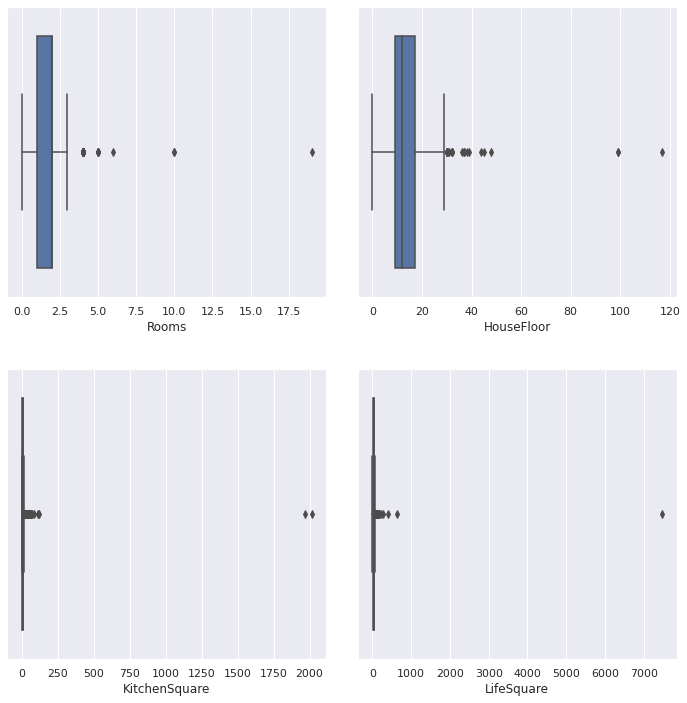

In [354]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, 
                         sharey = True,
                         figsize=(12, 12)
                        )

feature_names = train_df[['Rooms', 'HouseFloor', 'KitchenSquare', 'LifeSquare']].columns.tolist()

for feature, ax in zip(feature_names, axes.flatten()):
    ax.plot(ax=axes, label=feature)
    sns.boxplot(x=feature, data=train_df, ax=ax)

fig.subplots_adjust(hspace=0.25, wspace=0.1)


In [355]:
def num_val_counts(dataset):

  print('Ecology_1' + ' ' + str(train_df['Ecology_1'].value_counts().size))
  print('Ecology_2' + ' ' + str(train_df['Ecology_2'].value_counts().size))
  print('Ecology_3' + ' ' + str(train_df['Ecology_3'].value_counts().size))
  print('Social_1' + ' ' + str(train_df['Social_1'].value_counts().size))
  print('Social_2' + ' ' + str(train_df['Social_2'].value_counts().size))
  print('Social_3' + ' ' + str(train_df['Social_3'].value_counts().size))
  print('Healthcare_1' + ' ' + str(train_df['Healthcare_1'].value_counts().size))
  print('Helthcare_2' + ' ' + str(train_df['Helthcare_2'].value_counts().size))
  print('Shops_1' + ' ' + str(train_df['Shops_1'].value_counts().size))
  print('Shops_2' + ' ' + str(train_df['Shops_2'].value_counts().size))

num_val_counts(train_df)

#see that Ecology_2, Ecology_3, Shops_2 can reformate into binary .


Ecology_1 128
Ecology_2 2
Ecology_3 2
Social_1 51
Social_2 141
Social_3 30
Healthcare_1 78
Helthcare_2 7
Shops_1 16
Shops_2 2


In [356]:
def prepare_dataset(dataset):
  #rename columns with lower case
  dataset.columns=dataset.columns.str.lower()
  
  # Check for data duplications
  dataset.duplicated().sum()

  #formating into binary
  dataset['ecology_2'].replace({'A':0, 'B':1}, inplace=True)
  dataset['ecology_3'].replace({'A':0, 'B':1}, inplace=True)
  dataset['shops_2'].replace({'A':0, 'B':1}, inplace=True)

  #fillna
  dataset['lifesquare']=train_df['lifesquare'].fillna(train_df['square']-train_df['kitchensquare'])
  dataset['healthcare_1']=train_df['healthcare_1'].fillna(train_df['healthcare_1'].mode()[0])

  #working with anomalies ant outlist
  dataset['housefloor']=dataset['housefloor'].astype(int)
  dataset.loc[dataset['floor']>dataset['housefloor'], 'floor']=dataset['housefloor'].mode()[0]
  dataset.loc[dataset['houseyear']>2022, 'houseyear']=2022
  dataset.loc[dataset['rooms']>5, 'rooms'] = dataset['rooms'].mode()[0]
  dataset.loc[dataset['housefloor']>25, 'housefloor'] = dataset['housefloor'].mode()[0]
  dataset.loc[dataset['kitchensquare']>25, 'kitchensquare'] = dataset['kitchensquare'].median()
  dataset.loc[dataset['lifesquare']>250, 'lifesquare'] = dataset['lifesquare'].median()




In [357]:
prepare_dataset(train_df)



In [358]:
train_df.describe()

,index,id,districtid,rooms,square,lifesquare,kitchensquare,floor,housefloor,houseyear,...,ecology_2,ecology_3,social_1,social_2,social_3,healthcare_1,helthcare_2,shops_1,shops_2,price
count,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,...,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000
mean,5014.526942,8364.282865,47.897300,1.793939,53.792107,39.380025,5.426777,9.546777,12.367052,1984.518127,...,0.989532,0.973994,24.118567,5237.408044,7.373444,825.009036,1.244738,4.083526,0.911846,191999.000566
std,2884.018538,4848.062510,41.996216,0.763294,19.394860,19.621830,3.784358,5.650840,6.341177,17.899598,...,0.101783,0.159160,17.859277,4065.969893,23.383407,746.154602,1.458312,4.805664,0.283535,61208.344531
min,0.000000,0.000000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1910.000000,...,0.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,0.000000,59174.778028
25%,2519.500000,4142.500000,16.000000,1.000000,41.180217,23.899489,1.000000,5.000000,9.000000,1974.000000,...,1.000000,1.000000,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,1.000000,149434.665592
50%,5019.000000,8381.000000,30.000000,2.000000,49.305991,34.858602,6.000000,8.000000,12.000000,1977.000000,...,1.000000,1.000000,25.000000,5261.000000,1.000000,540.000000,1.000000,3.000000,1.000000,185083.534141
75%,7516.500000,12558.500000,73.000000,2.000000,63.131388,47.982280,8.000000,16.000000,17.000000,1998.000000,...,1.000000,1.000000,35.000000,7227.000000,4.000000,900.000000,2.000000,5.000000,1.000000,229578.589749
max,9999.000000,16798.000000,209.000000,5.000000,641.065193,211.231125,25.000000,37.000000,25.000000,2022.000000,...,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,349860.974274


In [359]:
from pandas.io.sql import read_sql_table
def new_features(df):

   districtpopularity=df['districtid'].value_counts().reset_index()\
  .rename(columns={'index':'districtid', 'districtid':'districtpopularity'})
   df=df.merge(districtpopularity, on='districtid', how='left')


   df['value_year']=0
   df.loc[df['houseyear']<=1960, 'value_year']=10
   df.loc[(df['houseyear']>1960)&(df['houseyear']<=1970), 'value_year']=9
   df.loc[(df['houseyear']>1970)&(df['houseyear']<=1980), 'value_year']=8
   df.loc[(df['houseyear']>1980)&(df['houseyear']<=1985), 'value_year']=7
   df.loc[(df['houseyear']>1985)&(df['houseyear']<=1990), 'value_year']=6
   df.loc[(df['houseyear']>1990)&(df['houseyear']<=1995), 'value_year']=5
   df.loc[(df['houseyear']>1995)&(df['houseyear']<=2000), 'value_year']=4
   df.loc[(df['houseyear']>2000)&(df['houseyear']<=2005), 'value_year']=3
   df.loc[(df['houseyear']>2005)&(df['houseyear']<=2010), 'value_year']=2
   df.loc[(df['houseyear']>2010)&(df['houseyear']<=datetime.now().year), 'value_year']=1

   df['sqm_price']=df['price']/df['square'].round(decimals=2)
   df['fl_to_housefloor']=df['housefloor']/df['floor']

   df['value_floor']=1
   df.loc[(df['fl_to_housefloor']==df['housefloor']) | (df['fl_to_housefloor']==1) | (df['fl_to_housefloor']<0.2), 'value_floor']=0

  

In [360]:
new_features(train_df)

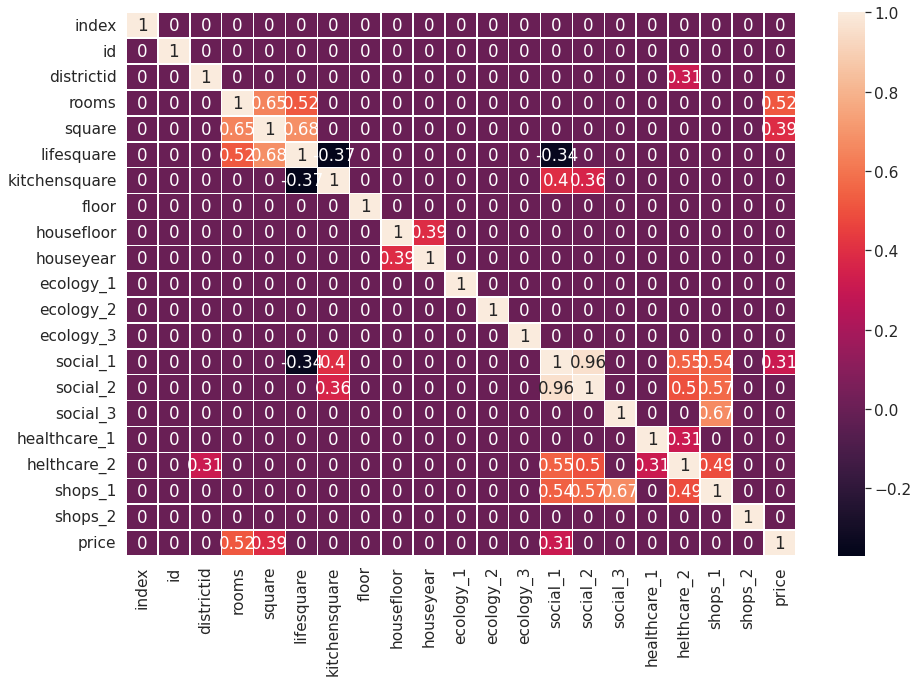

In [361]:
#find correlation between features
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

cm=train_df.corr()
cm=np.round(cm, 2)
cm[np.abs(cm)<0.3]=0

sns.heatmap(cm, annot=True, linewidth=0.5)
plt.show()

#unexpected correlation districtid-helthcare_2 and social_1-price

In [362]:
def evaluate_preds(true_values, pred_values, save=False):
     
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
         
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
         
    
   

In [363]:
train_df.columns.to_list()

['index',
 'id',
 'districtid',
 'rooms',
 'square',
 'lifesquare',
 'kitchensquare',
 'floor',
 'housefloor',
 'houseyear',
 'ecology_1',
 'ecology_2',
 'ecology_3',
 'social_1',
 'social_2',
 'social_3',
 'healthcare_1',
 'helthcare_2',
 'shops_1',
 'shops_2',
 'price']

In [364]:
#choose features for model
f_names=['rooms', 'square', 'lifesquare', 'kitchensquare', 'floor', 'housefloor', 'ecology_1', 'ecology_2', 'ecology_3',
 'social_1', 'social_2', 'social_3', 'healthcare_1', 'helthcare_2', 'shops_1', 'shops_2', 'districtpopularity', 'sqm_price', 'value_year', 'value_floor']
f_target= 'price'

In [365]:
#split df
x=train_df[f_names]
y=train_df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=42)

KeyError: ignored

In [ ]:
#learning
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=8,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=180)
gb_model.fit(x_train, y_train)

y_train_preds = gb_model.predict(x_train)
evaluate_preds(y_train, y_train_preds)


In [ ]:
y_test_preds = gb_model.predict(x_test)
evaluate_preds(y_test, y_test_preds)

In [ ]:
#find more important features
gb_model.feature_importances_

In [ ]:
feature_importances = pd.DataFrame(zip(x_train.columns, 
                                       gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances.head()

In [ ]:
test_df=pd.read_csv(test_path_data)

In [ ]:
test_df.sample(5)

In [ ]:
test_df.info()

In [ ]:
prepare_dataset(test_df)

In [272]:
predictions = gb_model.predict(test_df)

ValueError: ignored